# EDA

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [7]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [8]:
df['MEMBER_NO'].nunique()

62988

## Descriptive Statistics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Deskripsi tiap kolom;
<br> 
<br> MEMBER_NO-b : ID Member
<br> FFP_DATE : Frequent Flyer Program Join Date
<br> FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
<br> GENDER : Jenis Kelamin
<br> FFP_TIER : Tier dari Frequent Flyer Program
<br> WORK_CITY : Kota Asal
<br> WORK_PROVINCE : Provinsi Asal
<br> WORK_COUNTRY : Negara Asal
<br> AGE : Umur Customer
<br> LOAD_TIME : Tanggal data diambil
<br> FLIGHT_COUNT : Jumlah penerbangan Customer
<br> BP_SUM : Rencana Perjalanan
<br> SUM_YR_1 : Fare Revenue
<br> SUM_YR_2 : Votes Prices
<br> SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
<br> LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
<br> LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
<br> AVG_INTERVAL : Rata-rata jarak waktu
<br> MAX_INTERVAL : Maksimal jarak waktu
<br> EXCHANGE_COUNT : Jumlah penukaran
<br> avg_discount : Rata rata discount yang didapat customer
<br> Points_Sum : Jumlah poin yang didapat customer
<br> Point_NotFlight : point yang tidak digunakan oleh members
<br>
<br> Kesimpulan;
<br> 
<br> 1. Terdapat 62988 baris dengan index dari 0 sampai 62987.
<br> 2. Terdapat 23 kolom dengan index 0 sampai 22.
<br> 3. Terdapat tiga tipe data yakni int64, object, dan float64.

In [10]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Kesimpulan;
<br>
<br> Terdapat 7 kolom yang memiliki nilai null. Berikut urutan dari kolom dengan null paling banyak hingga kolom dengan nilai null yang paling kecil:
<br> 1. WORK_PROVINCE
<br> 2. WORK_CITY
<br> 3. SUM_YR_1
<br> 4. AGE
<br> 5. SUM_YR_2
<br> 6. WORK_COUNTRY
<br> 7. GENDER

In [11]:
cat=df.select_dtypes(include=['object']).columns
num=df.select_dtypes(include=['int64', 'float64']).columns
print('data_category: ',cat)
print('data_numerical: ',num)

data_category:  Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')
data_numerical:  Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')


In [12]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


<br> Kesimpulan;
<br>
<br> 1. MEMBER_NO = Normal
<br> 2. FFP_TIER = Positively Skewed
<br> 3. AGE = Normal
<br> 4. FLIGHT_COUNT = Positively Skewed
<br> 5. BP_SUM = Positively Skewed
<br> 6. SUM_YR_1 = Positively Skewed
<br> 7. SUM_YR_2 = Positively Skewed
<br> 8. SEG_KM_SUM = Positively Skewed
<br> 9. LAST_TO_END =  Positively Skewed
<br> 10. AVG_INTERVAL =  Positively Skewed
<br> 11. MAX_INTERVAL =  Positively Skewed
<br> 12. EXCHANGE_COUNT = Positively Skewed
<br> 13. avg_discount = Positively Skewed
<br> 14. Points_Sum = Positively Skewed
<br> 15. Point_NotFlight = Positively Skewed

In [13]:
df[cat].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


Kesimpulan;
<br>
<br> 1. Keseluruhan dari nilai unique pada tiap kolom kategorikal masih masuk akal.
<br> 2. Frekuensi dari top value dari tiap kolom juga cenderung balance. Lebih lanjut mengenai keputusan untuk menghapus unique dengan frekuensi kecil dapat dilakukan pada tahap pre-processing.

### Takeaways
<br> 1. Menyelesaikan persoalan data null di beberapa kolom pada proses pre-processing.
<br> 2. Memastikan distribusi data dengan visualisasi pada proses univariate analysis.

## Univariate Analysis

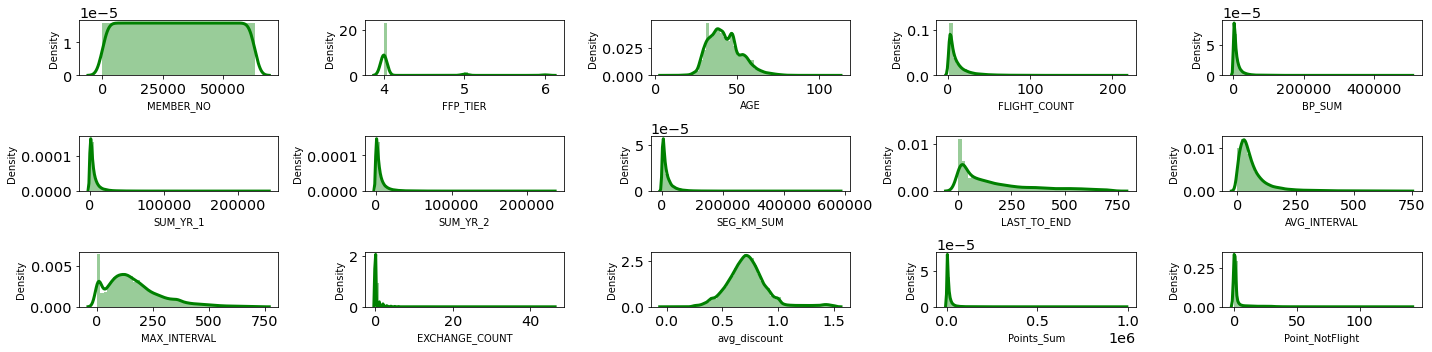

In [14]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num)):
    plt.subplot(3, len(num)/3, i+1)
    sns.distplot(df[num[i]], color='green')
    plt.tight_layout()

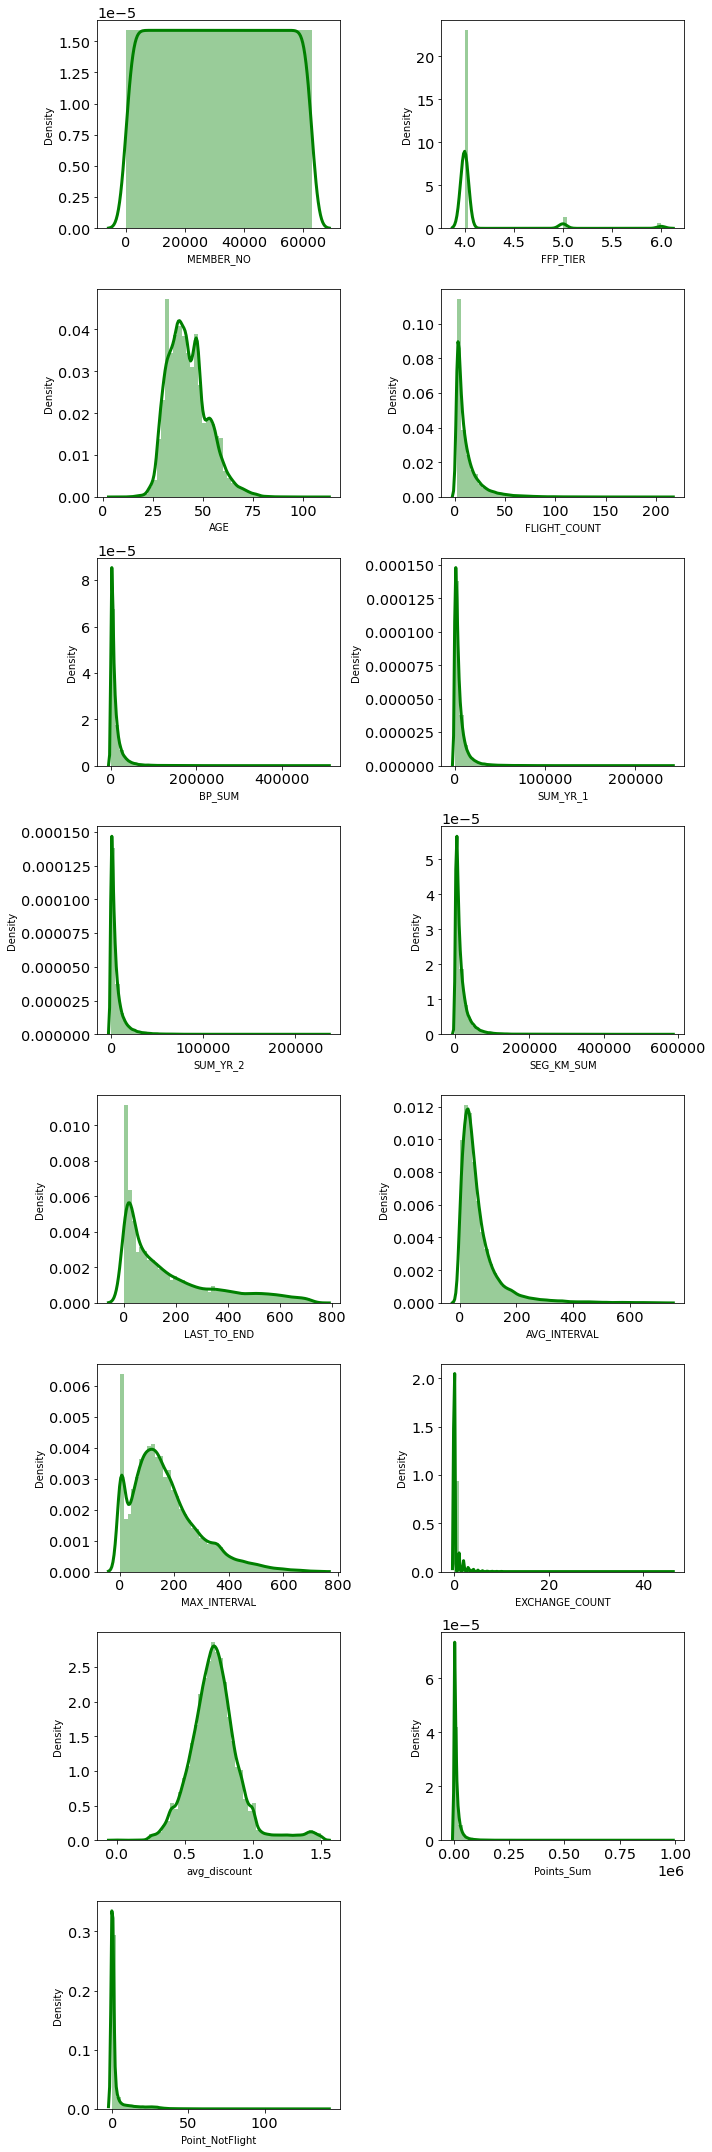

In [15]:
# mas bagus, ini aku coba bikin yang agak gedean kayaknya keliatannya lebih enak - dito

plt.figure(figsize=(10, 30))
for i in range(0, len(num)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df[num[i]], color='green')
    plt.tight_layout()

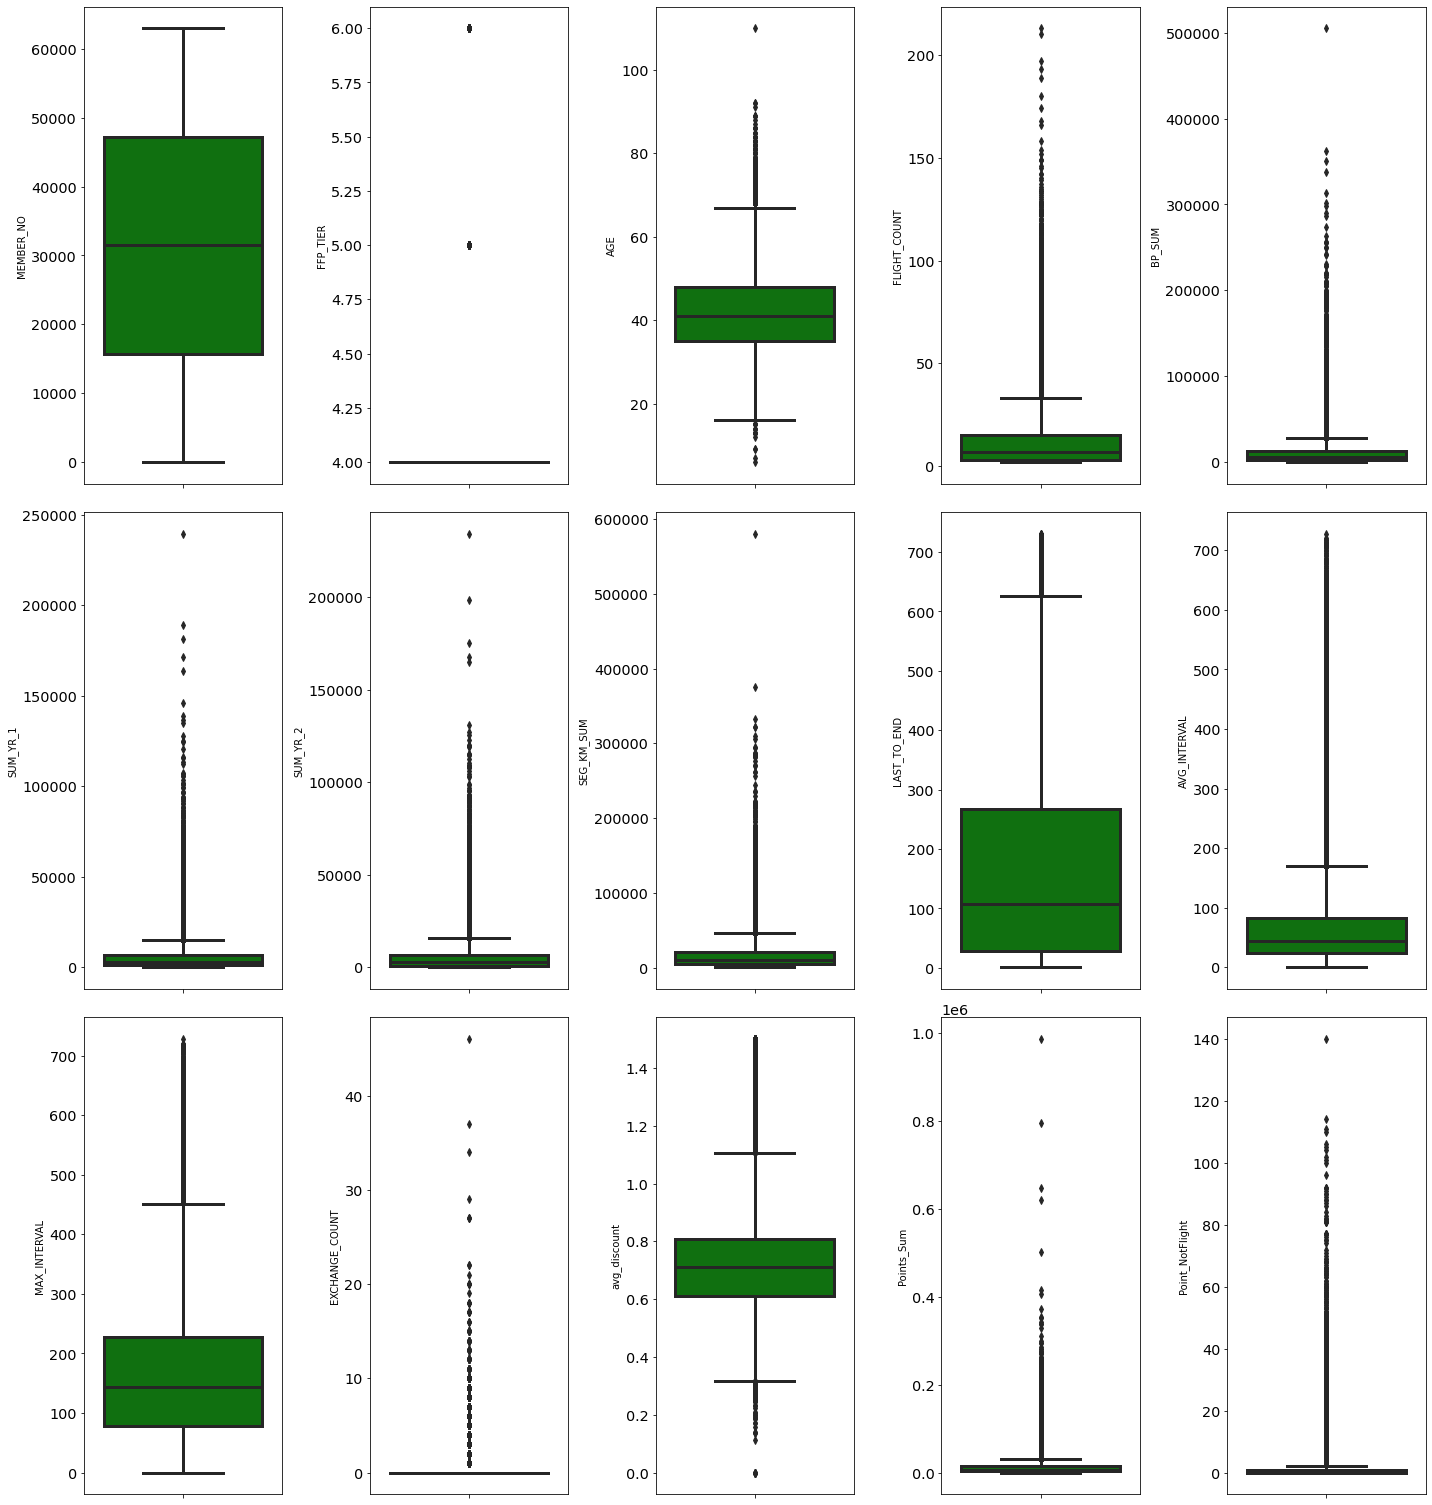

In [ ]:
plt.figure(figsize=(20, 35))
for i in range(0, len(num)):
    plt.subplot(5, len(num)/3, i+1)
    sns.boxplot(y=df[num[i]], color='green', orient='v')
    plt.tight_layout()

### Takeaways;
<br> 1. Kolom dengan distribusi positively skewed; FFP_TIER, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, dan Point_NotFlight (13).
<br> 2. Kolom dengan distribusi normal; MEMBER_NO, dan AGE (2).

## Multivariate Analysis

<Figure size 1080x1080 with 0 Axes>

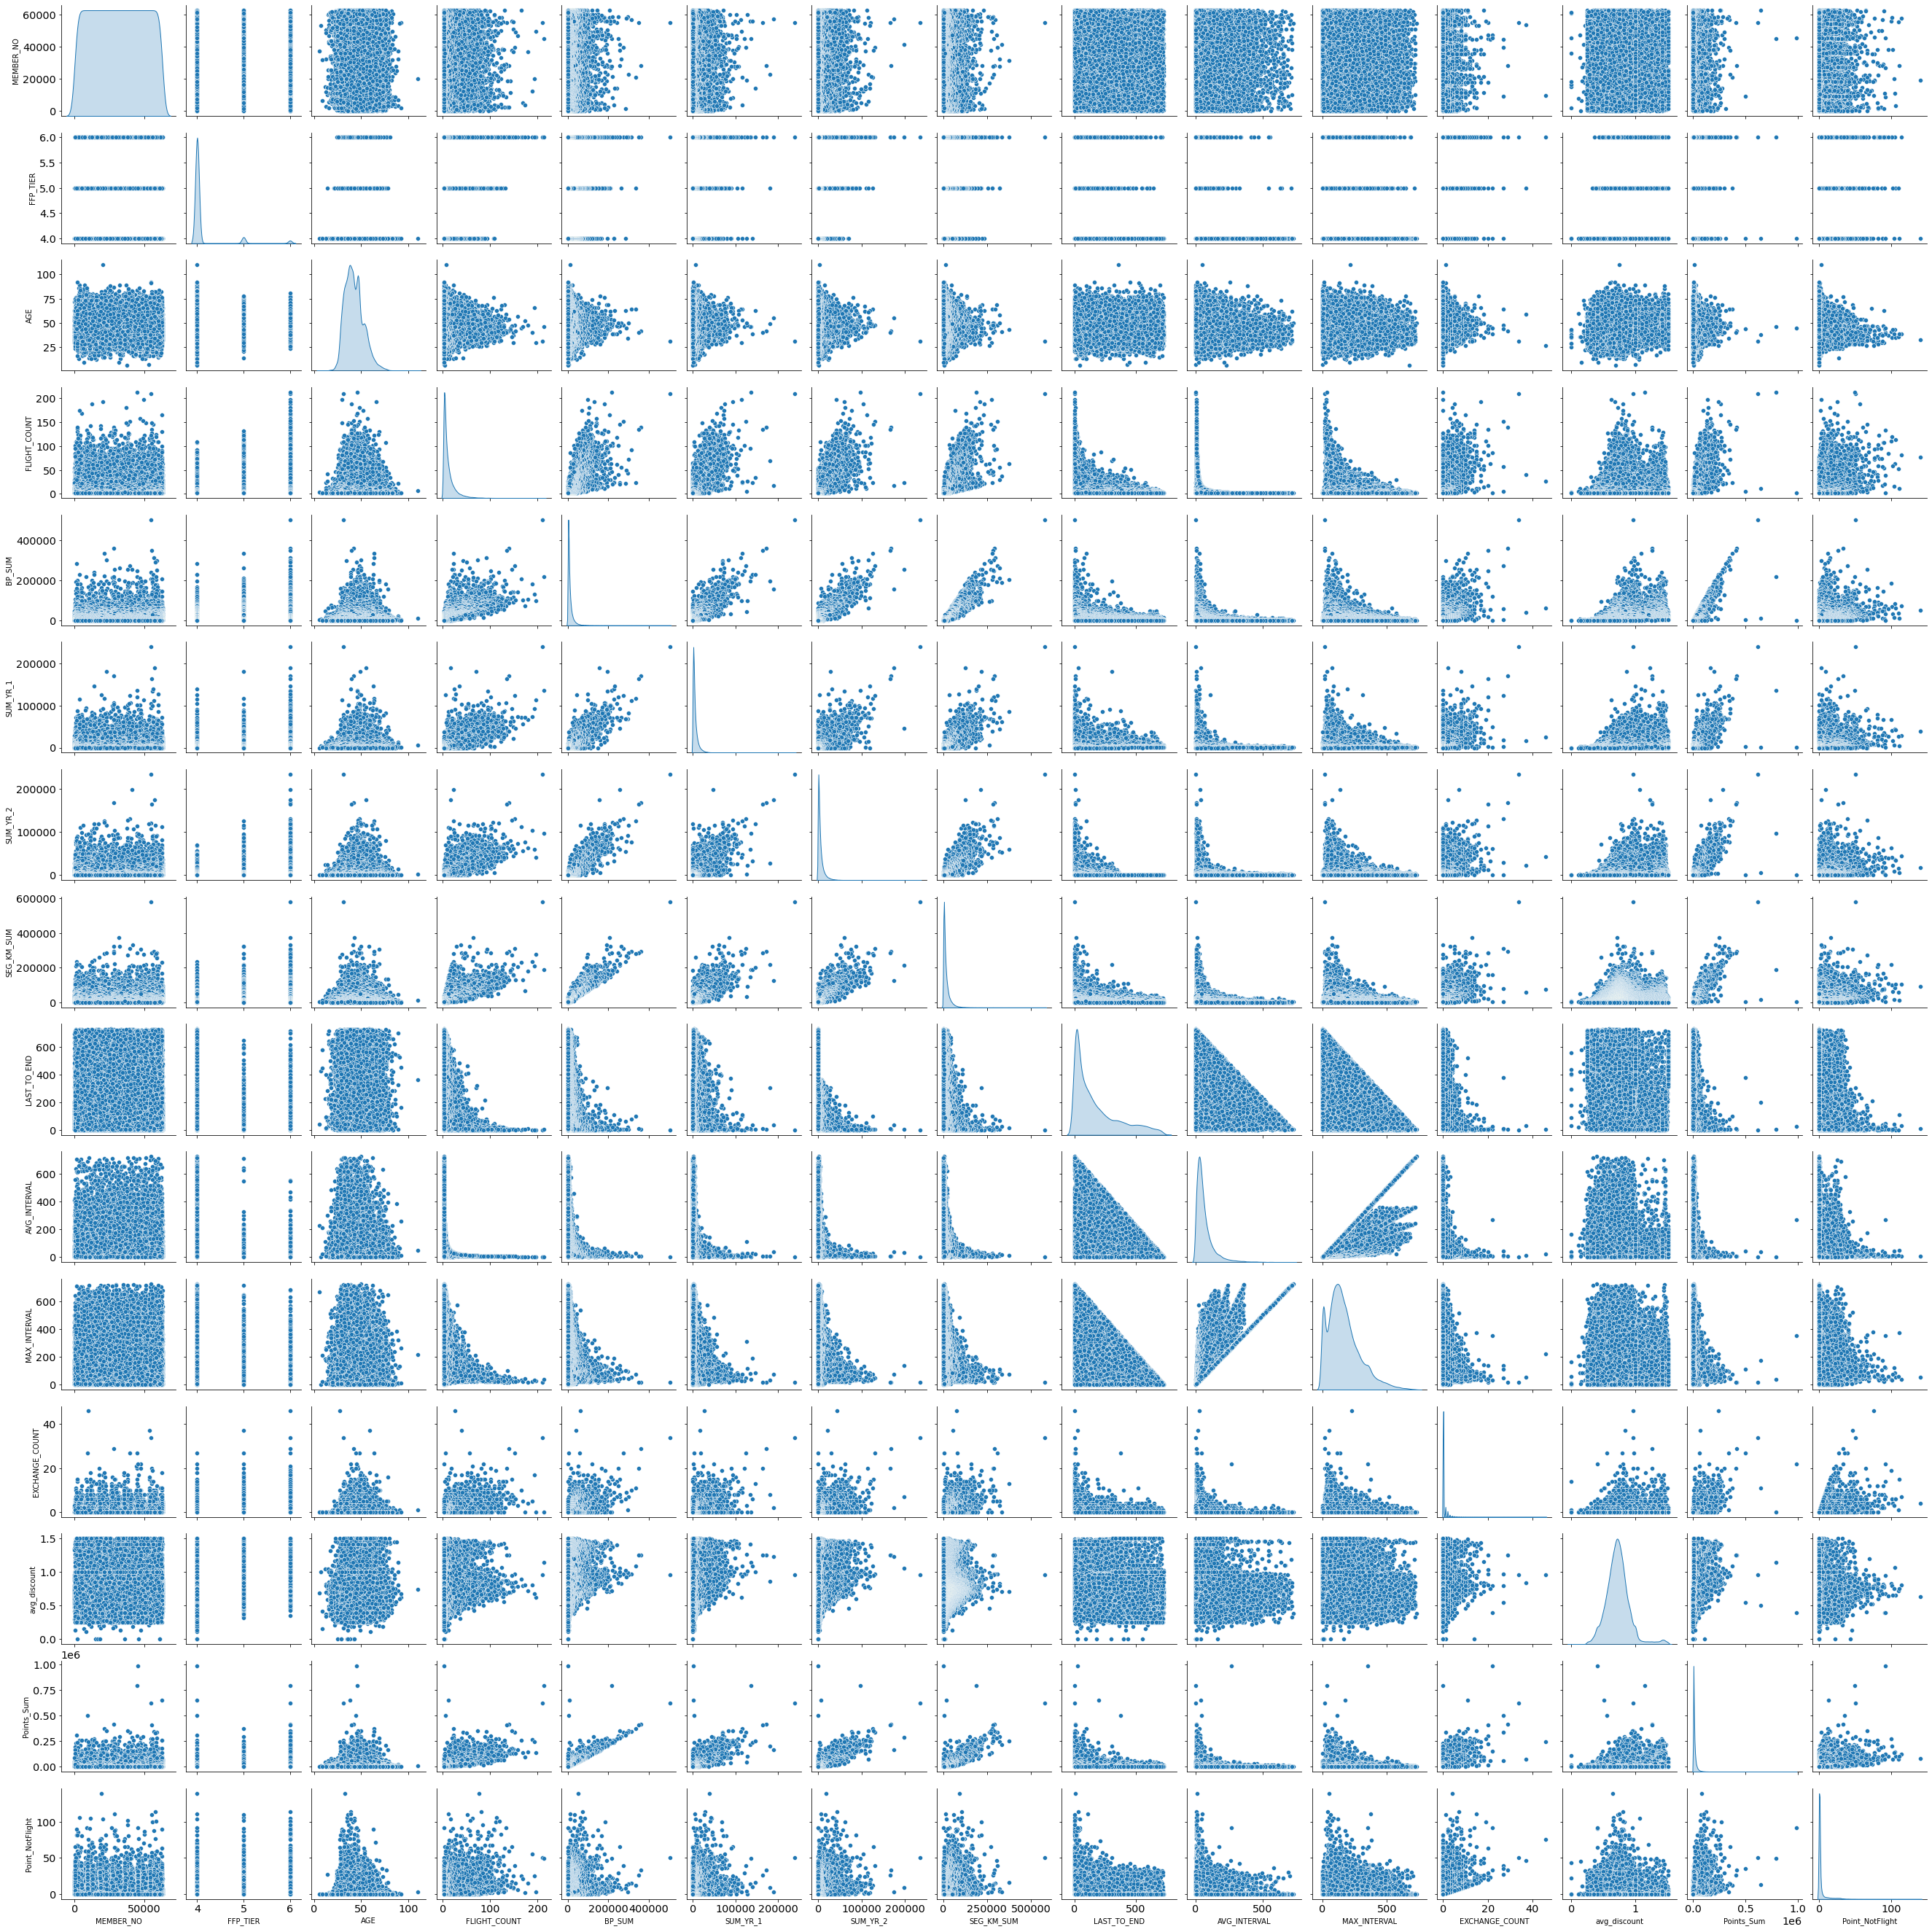

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:>

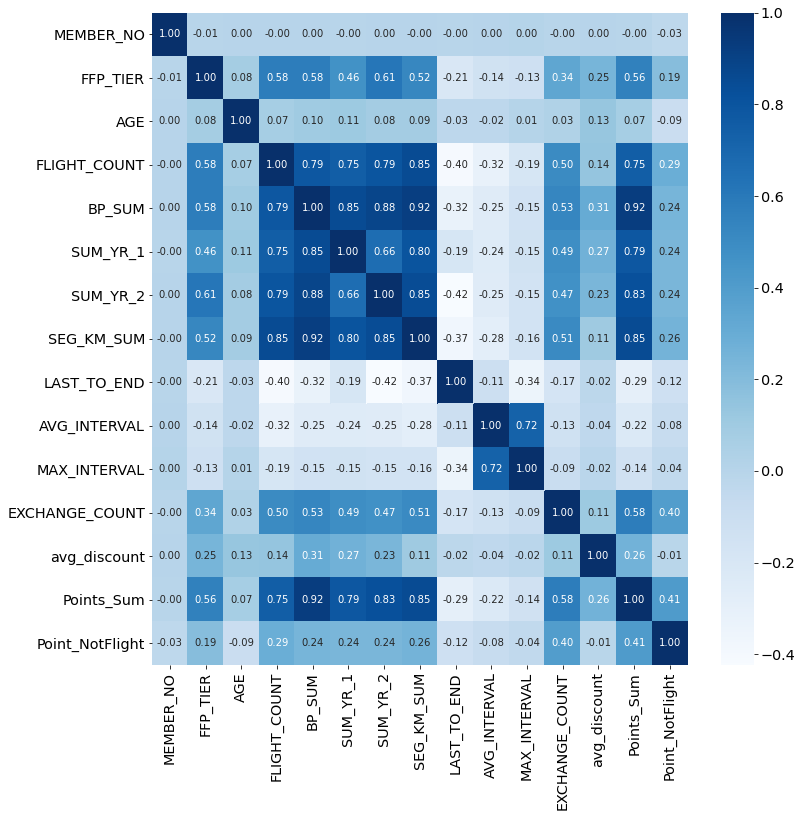

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Takeaways;
<br> 1. Kolom BP_SUM & FLIGHT_COUNT berkorelasi tinggi.
<br> 2. Kolom SUM_YR_1 & FLIGHT_COUNT berkorelasi tinggi.
<br> 3. Kolom SUM_YR_2 & FLIGHT_COUNT berkorelasi tinggi.
<br> 4. Kolom SEG_KM_SUM & FLIGHT_COUNT berkorelasi tinggi.
<br> 5. Kolom Point_Sum & FLIGHT_COUNT berkorelasi tinggi.
<br> 6. Kolom SUM_YR_1 & BP_SUM berkorelasi tinggi.
<br> 7. Kolom SUM_YR_2 & BP_SUM berkorelasi tinggi.
<br> 8. Kolom SEG_KM_SUM & BP_SUM berkorelasi tinggi.
<br> 9. Kolom Point_Sum & BP_SUM berkorelasi tinggi.
<br> 10. Kolom SEG_KM_SUM & SUM_YR_1 berkorelasi tinggi.
<br> 11. Kolom Point_Sum & SUM_YR_1 berkorelasi tinggi.
<br> 12. Kolom SEG_KM_SUM & SUM_YR_2 berkorelasi tinggi.
<br> 13. Kolom Point_Sum & SUM_YR_2 berkorelasi tinggi.
<br> 14. Kolom MAX_INTERVAL & AVG_INTERVAL berkorelasi tinggi.

## Data Pre Processing

In [17]:
df_clean = df.copy()

### Check Null Value

In [18]:
df_clean.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [19]:
# fillna null value pada kolom work_city, work_province, work_country, gender menggunakan modus

df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)
df_clean['WORK_COUNTRY'].fillna(df_clean['WORK_COUNTRY'].mode()[0], inplace=True)
df_clean['GENDER'].fillna(df_clean['GENDER'].mode()[0], inplace=True)

In [20]:
# fillna num value pada kolom sum_yr_1, sum_yr_2 menggunakan median 

df_clean['SUM_YR_1'].fillna(df_clean['SUM_YR_1'].median(), inplace=True)
df_clean['SUM_YR_2'].fillna(df_clean['SUM_YR_2'].median(), inplace=True)

In [21]:
#fillna age menggunakan mean

df_clean['AGE'].fillna(round(df_clean['AGE'].mean()), inplace=True)

In [22]:
df_clean.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Check Duplicated Data

In [23]:
#mas dito ini aku ubah jadi df_clean ya, karena sebelumnya masih df - vanny
df_clean.duplicated().sum()

0

### Check Anomali Data

In [24]:
#29 Februari hanya muncul 4 tahun sekali atau merupakan tahun kabisat sehingga dikhawatirkan menyebabkan data tidak seragam
df_clean.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [25]:
df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

0

In [26]:
df_clean['MEMBER_NO'].nunique()

62567

# Feature Engineering

Reference :
<br>1. [Books.google](https://books.google.co.id/books?id=CcH4DwAAQBAJ&pg=PA95&lpg=PA95&dq=chinese+member+airline+data+customer+bp_sum&source=bl&ots=MuNwvzNnN-&sig=ACfU3U0hPyubVpBG7RGuxmQgm9Zn7m2g6g&hl=en&sa=X&ved=2ahUKEwjZsKzHy7LsAhWZaCsKHW9XDW8Q6AEwCHoECAoQAg#v=onepage&q=chinese%20member%20airline%20data%20customer%20bp_sum&f=false)
<br>2. [Customer value analysis of Chapter 7 Airlines](https://www.fatalerrors.org/a/python-data-analysis-and-mining-customer-value-analysis-of-chapter-7-airlines.html)
<br>3. [An Airline ustomer value analysis](https://www.programmersought.com/article/48113472881/)

Bagaimana mengklasifikasikan Customer bedasarkan karakteristik dari penumpang udara dan kemudian membuat strategi pemasaran yang terpersonalisasi untuk mereka adalah tujuan dari permasalahan pada dataset ini untuk diselesaikan. Bertujuan untuk mengoptimasi alokasi sumber daya, analisis Customer value pada dataset ini berlandaskan dan menggunakan metode LRFMC model.

Berikut deskripsi setiap Variabel yang digunakan pada LRFMC model sebagai identifikasi customer value :
<br> a. L : Hubungan Customer
<br> b. R : Penggunaan interval waktu
<br> c. F : Frequency penerbangan
<br> d. M : Jarak tempuh penerbangan
<br> e. C : Rata-rata nilai dari koefisien diskon 

Ada terlalu banyak atribut dalam dataset ini. Menurut model nilai Customer maskapai penerbangan LRFMC, enam atribut terpilih yang terkait dengan indeks LRFMC  yaitu : 
<br>1. FFP_DATE
<br>2. LOAD_TIME
<br>3. FLIGHT_COUNT
<br>4. AVG_DISCOUNT
<br>5. SEG_KM_SUM
<br>6. LAST_TO_END. 

Kita dapat menghapus feature-feature lain yang tidak relevan seperti WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, etc namun untuk lebih mengefisiensikan kode yang digunakan kita akan membuat dataframe baru untuk memproses 6 feature yang relevan dengan LRFMC model.

Feature Exstraction & Transaformation :
<br> a. L = LOAD_TIME-FFP_DATE
<br> Jarak antara waktu terakhir observasi sampai waktu pertama bergabung = waktu terakhir observasi(pengambilan data) - waktu pertama bergabung (satuan: bulan)
<br> b. R=LAST_TO_END
<br> Jumlah bulan dari waktu terakhir Customer melakukan penerbangan hingga waktu terakhir observasi = Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir (satuan: bulan)
<br> c. F=FLIGHT_COUNT
<br> Jumlah penerbangan Customer dalam waktu pengamatan = Jumlah penerbangan Customer (satuan: berapa kali)
<br> d. M=SEG_KM_SUM
<br> Akumulasi jarak tempuh penerbangan pelanggan dalam waktu pengamatan = Total jarak(km) penerbangan yg sudah dilakukan (unit: km)
<br> e. C=AVG_DISCOUNT
<br> Nilai rata-rata koefisien diskon yang sesuai dengan kabin pelanggan selama waktu observasi = rata-rata tingkat diskon (unit: none)

## Feature Extraction 

In [28]:
#Feature extraction dengan memindahkan ke DataFrame baru bernama lrfmc
L = (pd.to_datetime(df_clean['LOAD_TIME']) - pd.to_datetime(df_clean['FFP_DATE']))
lrfmc = pd.DataFrame((L / np.timedelta64(1, 'D')) / 30, columns= ['L'])
lrfmc['R'] = df_clean['LAST_TO_END'] / 30
lrfmc['F'] = df_clean['FLIGHT_COUNT']
lrfmc['M'] = df_clean['SEG_KM_SUM']
lrfmc['C'] = df_clean['avg_discount']
lrfmc

,L,R,F,M,C
0,90.200000,0.033333,210,580717,0.961639
1,86.566667,0.233333,140,293678,1.252314
2,87.166667,0.366667,135,283712,1.254676
3,68.233333,3.233333,23,281336,1.090870
4,60.533333,0.166667,152,309928,0.970658
...,...,...,...,...,...
62983,34.866667,9.900000,2,1134,0.000000
62984,49.466667,2.966667,4,8016,0.000000
62985,97.433333,0.966667,2,2594,0.000000
62986,13.933333,13.333333,2,3934,0.000000


Setelah data dari lima indikator diekstraksi,Kisaran nilai dari kelima indikator tersebut cukup berbeda, maka perlu dilakukan standarisasi data (bisa menggunakan zscore method untuk menormalisasi data atau function StandardScaler

### Handle Outliers

In [31]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier:{len(lrfmc)}')

filtered_entries = np.array([True]*len(lrfmc))

for col in ['L', 'R', 'F', 'M', 'C']:
    zscore=abs(stats.zscore(lrfmc[col]))
    filtered_entries=(zscore<3) & filtered_entries
    
for col in ['L', 'R', 'F', 'M', 'C']:
    Q1 = lrfmc[col].quantile(0.25)
    Q3 = lrfmc[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((lrfmc[col] >= low_limit) & (lrfmc[col] <= high_limit)) & filtered_entries

lrfmc = lrfmc[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(lrfmc)}')

Jumlah baris sebelum memfilter outlier:62567
Jumlah baris setelah memfilter outlier: 52891


## Standarisasi

In [32]:
#Standarisasi menggunakan function StandardScaler pada feature F
from sklearn.preprocessing import MinMaxScaler, StandardScaler
lrfmc['F'] = StandardScaler().fit_transform(lrfmc['F'].values.reshape(len(lrfmc), 1))
lrfmc['F']

2458     2.907651
2516    -0.097083
2630     2.907651
2664    -0.383248
2667     1.333743
           ...   
62965   -0.955578
62966   -0.955578
62973   -0.955578
62974   -0.955578
62975   -0.955578
Name: F, Length: 52891, dtype: float64

In [33]:
#Standarisasi dengan menggunakan metode zscore, hasilnya sama pada saat menggunakan function Standardscaler,
#namun dibaris code ini langsung mengeksekusi ke semua featurenya
lrfmc = (lrfmc - lrfmc.mean(axis=0))/lrfmc.std(axis=0) 
lrfmc.columns = ['Z' + i for i in lrfmc.columns]
lrfmc

,ZL,ZR,ZF,ZM,ZC
2458,1.505827,-0.956382,2.907624,3.193027,2.743066
2516,0.871979,-0.406774,-0.097082,3.376851,2.353094
2630,-0.117735,-1.010148,2.907624,3.217652,2.466990
2664,1.075673,1.552700,-0.383244,3.362259,2.195526
2667,0.189005,-0.125996,1.333730,3.272475,2.331630
...,...,...,...,...,...
62965,0.596393,1.445168,-0.955569,-1.207201,0.346137
62966,-0.979241,1.409324,-0.955569,-1.207201,0.346137
62973,-1.290773,1.080754,-0.955569,-1.167477,-2.396602
62974,2.162441,-0.520280,-0.955569,-1.207201,0.071863


Setelah ini feature yang sudah diekstraksi dan standarisasi bisa diproses untuk cluster modeling

# Clustering (model KMeans)

In [68]:
from sklearn.cluster import KMeans
inertia = []


kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(lrfmc.values)
inertia.append(kmeans.inertia_)

In [69]:
print(lrfmc.values)

[[ 1.50582707 -0.95638242  2.90762357  3.19302682  2.74306593]
 [ 0.87197901 -0.40677381 -0.09708184  3.37685099  2.35309359]
 [-0.1177346  -1.01014848  2.90762357  3.21765155  2.46698952]
 ...
 [-1.29077288  1.08075382 -0.9555691  -1.16747699 -2.3966023 ]
 [ 2.16244094 -0.52027994 -0.9555691  -1.20720085  0.0718635 ]
 [ 0.6191587  -0.32911173 -0.9555691  -1.20720085 -0.20241048]]


# Clustering Analysis

In [70]:
result = pd.DataFrame({"Cluster category": ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5']})

c1 = pd.Series(kmeans.labels_).value_counts()
r2 = pd.DataFrame(kmeans.cluster_centers_)
r = pd.concat([c1, r2], axis=1)

result = pd.concat([result, r], axis =1)
result.columns = ['Cluster_category', 'Number_clusters', 'ZL', 'ZR', 'ZF', 'ZM', 'ZC']
result

,Cluster_category,Number_clusters,ZL,ZR,ZF,ZM,ZC
0,Customer 1,10096,0.206224,-0.679902,1.651564,1.628665,0.093201
1,Customer 2,8604,-0.233334,1.705744,-0.694706,-0.670968,0.495611
2,Customer 3,10733,1.285195,-0.298738,-0.238843,-0.238433,0.084713
3,Customer 4,13699,-0.655632,-0.422928,-0.182508,-0.223818,0.477846
4,Customer 5,9759,-0.499105,0.117425,-0.572804,-0.512677,-1.296025


In [77]:
result['sum'] = result['ZF'] +result['ZM']
result

,Cluster_category,Number_clusters,ZL,ZR,ZF,ZM,ZC,sum
0,Customer 1,10096,0.206224,-0.679902,1.651564,1.628665,0.093201,3.280229
1,Customer 2,8604,-0.233334,1.705744,-0.694706,-0.670968,0.495611,-1.365674
2,Customer 3,10733,1.285195,-0.298738,-0.238843,-0.238433,0.084713,-0.477276
3,Customer 4,13699,-0.655632,-0.422928,-0.182508,-0.223818,0.477846,-0.406326
4,Customer 5,9759,-0.499105,0.117425,-0.572804,-0.512677,-1.296025,-1.085481


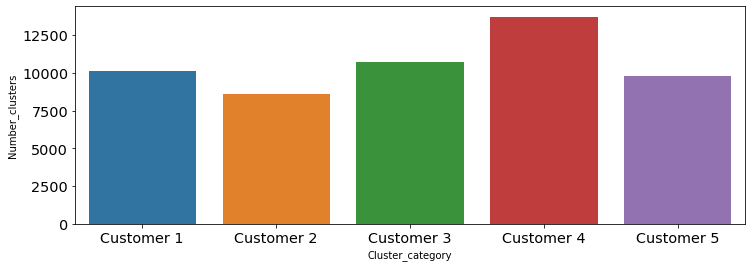

In [71]:
sns.barplot(x='Cluster_category', y='Number_clusters', data = result)